## Stroke Prediction

### project overview
The dataset from Kaggle titled "Stroke Prediction Dataset" provides a comprehensive collection of medical and lifestyle information on patients, which can be utilized to predict the likelihood of stroke occurrences. Given the profound global impact of strokes—causing significant morbidity, mortality, and healthcare costs—there is a critical need for effective preventive strategies. Healthcare providers and insurance companies are increasingly prioritizing preventive measures to mitigate the risk of stroke and enhance overall patient outcomes. This project seeks to leverage the dataset to optimize preventive healthcare programs aimed at reducing stroke incidences among high-risk populations.

## 1.Business Understanding
### Objective:

To develop a robust model to predict the likelihood of stroke in patients based on their health and demographic features, thereby providing valuable insights and aiding in better healthcare decision-making.

### Business Problem:

The challenge is to optimize preventive healthcare programs to reduce the incidence of strokes among high-risk populations.
Effective strategies need to be based on detailed analysis of medical and lifestyle data to tailor interventions for different risk profiles.

### Key Questions:

1.Which factors most significantly contribute to stroke risk?

3.How can we identify high-risk individuals using the available data?

3.What types of preventive measures can be tailored to different risk profiles?

### Stakeholders:

1.Healthcare providers who need to implement preventive measures.

2.Insurance companies interested in reducing costs associated with stroke treatment.

3.Patients who would benefit from personalized health interventions.

## 2. Data Understanding
Data Description:

The stroke prediction dataset contains a variety of features related to patient demographics, medical history, and lifestyle factors:

Demographic Information: Gender, age
Medical History: Hypertension, heart diseases
Lifestyle Factors: Smoking status, marital status
Health Indicators: Body mass index (BMI), glucose levels.
Target Variable: Stroke (binary outcome: 0 = No stroke, 1 = Stroke).
Data Quality:

Missing Values: Identify and address any missing data points.
Inconsistencies: Check for any anomalies or inconsistencies in the data(e.g., invalid data entries).
Outliers: Detect and analyze any outliers that may affect the model (e.g., age, BMI, glucose levels).



Feature Analysis:
I will be using (EDA), which begins with examining summary statistics such as the mean, median, and standard deviation for numerical features.This helps in understanding the central tendency and dispersion of the data. To further explore the data, histograms or density plots can be used for numerical features, while bar charts are suitable for visualizing categorical features. Correlation analysis, using Pearson or Spearman correlation coefficients, is conducted to identify relationships between numerical features and the target variable.

For assessing feature relevance, statistical tests such as the Chi-square test are applied to evaluate the relationship between categorical features and the target variable. Additionally, feature importance analysis, often performed using tree-based models, helps in determining which features most significantly contribute to predicting the target variable.


Distribution and Patterns:

An analysis of class distribution involves examining the balance between the target classes, such as the proportion of stroke versus non-stroke cases. This is crucial for understanding how evenly the classes are represented in the dataset. Pattern detection focuses on identifying any notable trends in the data, such as variations in age distribution among stroke cases.

Data Splitting:

To build and evaluate predictive models, the dataset is divided into training and testing sets. Typically, this involves splitting the data into 80% for training and 20% for testing. This separation allows for model training on one portion of the data while evaluating its performance on a separate, unseen portion.

Data Preparation:

Feature engineering involves creating new features or modifying existing ones to enhance model performance. For instance, age groups or BMI categories may be introduced to capture more nuanced information. Normalization or scaling techniques are applied to numerical features, such as standardizing age and glucose levels, to ensure that all features contribute equally to the model.

Data Visualization:

Visual exploration is a key part of data analysis, employing plots and charts such as scatter plots and box plots to visualize the relationships between features and the target variable. Heatmaps are also generated to visualize correlations between different features, providing insights into their interrelationships.

Potential Challenges:

One potential challenge is class imbalance, which may arise if there are significantly more non-stroke cases compared to stroke cases. Addressing this imbalance is important to avoid biased model predictions. Additionally, feature selection is crucial to identify and retain only the most relevant features, thereby reducing the risk of overfitting and enhancing model performance

## Imporing libraries

In [1]:
# for visualization
import pandas as pd
import numpy as np
from IPython.display import display
pd.plotting.register_matplotlib_converters()
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
# for modelling
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold , StratifiedKFold , cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


import warnings
warnings.filterwarnings('ignore')

#display all column of df 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)  

In [2]:
# loading the data
df= pd.read_csv("data/stroke.csv")
df.drop(["id"] ,axis=1, inplace=True)
df.shape

(5110, 11)

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [5]:
# Checking for the summary of categorical (object type) features in a pd df
# .T attribute transposes the resulting summary statistics df
df.describe(include="O").T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [6]:
# for the numerical feature
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


## Explanatory data analysis
We have two types of features , the categorical and numerical feature we'll deal with each group alone.

### Categorical features
#### Univariate analysis


In [7]:
cat = list(df.select_dtypes(include='O').columns) + ["stroke" , "hypertension" , "heart_disease"]
cat

['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke',
 'hypertension',
 'heart_disease']

In [8]:
# Convert specified columns in the 'cat' list to 'object' type for categorical processing.
# Then, remove 'stroke' from the list of categorical columns, possibly because it requires different handling or is not categorical.
df[cat] = df[cat].astype('object')
cat.remove('stroke')

In [9]:
# Iterate over each column in the 'cat' list, display the relative frequencies of unique values for each column,

for i in cat:
    display(df[i].value_counts(normalize=True))
    print("#"*20) # and print a separator line for clarity between the outputs.


gender
Female    0.585910
Male      0.413894
Other     0.000196
Name: proportion, dtype: float64

####################


ever_married
Yes    0.656164
No     0.343836
Name: proportion, dtype: float64

####################


work_type
Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: proportion, dtype: float64

####################


Residence_type
Urban    0.508023
Rural    0.491977
Name: proportion, dtype: float64

####################


smoking_status
never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: proportion, dtype: float64

####################


hypertension
0    0.902544
1    0.097456
Name: proportion, dtype: float64

####################


heart_disease
0    0.945988
1    0.054012
Name: proportion, dtype: float64

####################


We will calculate and display the proportion of each unique value in the 'stroke' column


In [10]:
# Calculate and display the proportion of each unique value in the 'stroke' column
df['stroke'].value_counts(normalize=True)


stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

We will calculate the mean value of the 'stroke' column, rounded to 3 decimal places


In [11]:
# stroke mean
stroke_mean = round(df['stroke'].mean() ,3)
stroke_mean # imbalance

0.049

AttributeError: 'int' object has no attribute 'startswith'

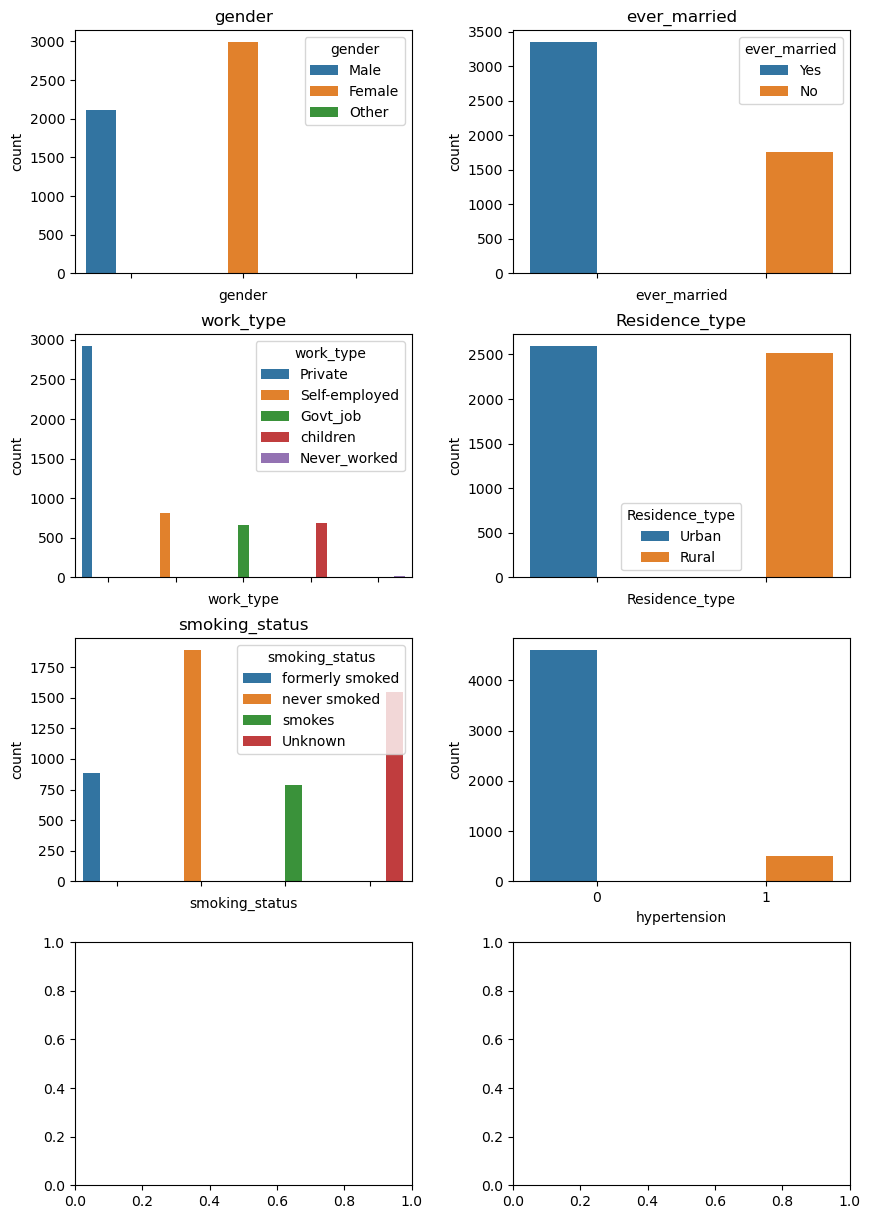

In [12]:
# Creating a 4x2 grid of subplots with adjusted spacing


figure, axis = plt.subplots(4, 2, figsize=(10, 15))
plt.subplots_adjust(hspace=0.25, wspace=0.3)

for i, column_name in enumerate(cat+['stroke']):
    row = i//2
    col = i % 2
    bp = sns.countplot(ax=axis[row, col], x=df[column_name] , hue=df[column_name]) 
    bp.set(xticklabels=[])
    #bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 7)
    axis[row, col].set_title(column_name)
plt.show()

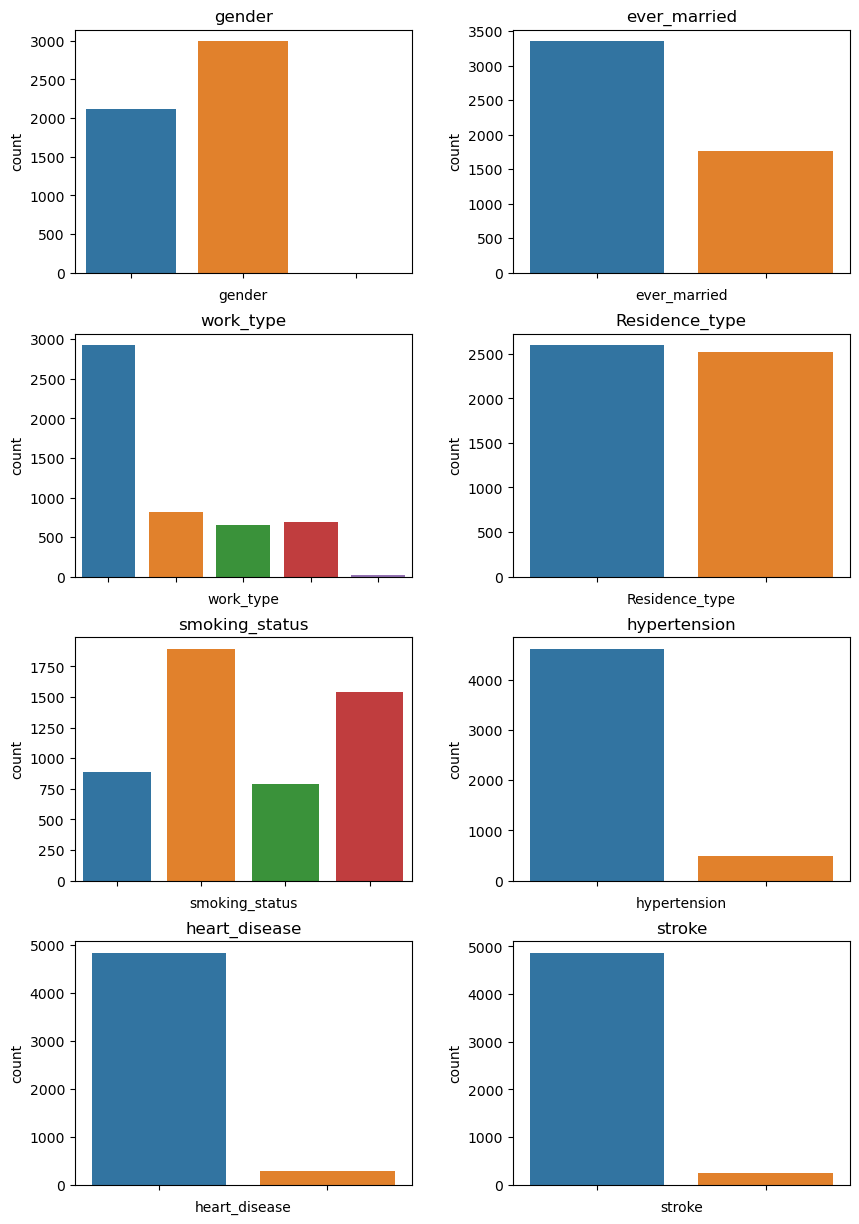

In [ ]:
figure, axis = plt.subplots(4, 2, figsize=(10, 15))
plt.subplots_adjust(hspace=0.25, wspace=0.3)

for i, column_name in enumerate(cat+['stroke']):
    row = i//2
    col = i % 2
    # Remove the hue parameter if it is causing issues
    bp = sns.countplot(ax=axis[row, col], x=df[column_name])
    bp.set(xticklabels=[]) # Remove x-axis tick labels
    # bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 7)
    axis[row, col].set_title(column_name)
plt.show()


In [ ]:
# checking the gender column
# Gender
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [ ]:
# drop the incetences with 'other' in gender
df.drop(df[df['gender'] == "Other"].index , axis = 0 , inplace = True)

In [ ]:
# treating unknown inctences as NaN's
df.drop(df[df['smoking_status'] == 'Unknown'].index ,axis=0 , inplace=True)

### Bivariate Analysis
We start by creating contingency tables

In [ ]:
# Create a contingency table
for feat in cat :
    contingency_table = pd.crosstab(df[feat], df['stroke'] , margins=True , margins_name='Total' , normalize='all')
    display(contingency_table)
    

stroke,0,1,Total
gender,,,
Female,0.572791,0.032539,0.60533
Male,0.370547,0.024123,0.39467
Total,0.943338,0.056662,1.00000


stroke,0,1,Total
ever_married,,,
No,0.233941,0.005891,0.239832
Yes,0.709397,0.050771,0.760168
Total,0.943338,0.056662,1.000000


stroke,0,1,Total
work_type,,,
Govt_job,0.143058,0.007013,0.150070
Never_worked,0.003927,0.000000,0.003927
Private,0.607013,0.033661,0.640673
Self-employed,0.169986,0.015989,0.185975
children,0.019355,0.000000,0.019355
Total,0.943338,0.056662,1.000000


stroke,0,1,Total
Residence_type,,,
Rural,0.464236,0.026928,0.491164
Urban,0.479102,0.029734,0.508836
Total,0.943338,0.056662,1.000000


stroke,0,1,Total
smoking_status,,,
formerly smoked,0.228331,0.019635,0.247966
never smoked,0.505470,0.025245,0.530715
smokes,0.209537,0.011781,0.221318
Total,0.943338,0.056662,1.000000


stroke,0,1,Total
hypertension,,,
0,0.835624,0.039271,0.874895
1,0.107714,0.017391,0.125105
Total,0.943338,0.056662,1.000000


stroke,0,1,Total
heart_disease,,,
0,0.890323,0.045722,0.936045
1,0.053015,0.010940,0.063955
Total,0.943338,0.056662,1.000000


We are going to find the risk ratio and difference in stroke rates for each categorical feature in the DataFrame, except for the 'stroke' column itself.
This will help in understanding how the stroke risk varies across different categories compared to the overall average stroke rate.

Risk Ratio (RR)

RR = P unexposed /P exposed

RR = 1: The risk of the event is the same in both the exposed and unexposed groups.

RR > 1: The risk of the event is higher in the exposed group compared to the unexposed group.

RR < 1: The risk of the event is lower in the exposed group compared to the unexposed group.

In [ ]:
for feat in cat: 
    if feat == 'stroke':
        pass
    else :
        df_grouped = df.groupby(by=feat)["stroke"].agg(["mean"]).reset_index()
        df_grouped["risk"] = df_grouped['mean'] / stroke_mean
        df_grouped["diff"] = df_grouped["mean"] - stroke_mean
        display(df_grouped)

,gender,mean,risk,diff
0,Female,0.053753,1.09701,0.004753
1,Male,0.061123,1.247407,0.012123


,ever_married,mean,risk,diff
0,No,0.024561,0.501253,-0.024439
1,Yes,0.06679,1.363054,0.01779


,work_type,mean,risk,diff
0,Govt_job,0.046729,0.953652,-0.002271
1,Never_worked,0.0,0.0,-0.049
2,Private,0.052539,1.072233,0.003539
3,Self-employed,0.085973,1.754548,0.036973
4,children,0.0,0.0,-0.049


,Residence_type,mean,risk,diff
0,Rural,0.054826,1.118894,0.005826
1,Urban,0.058434,1.192539,0.009434


,smoking_status,mean,risk,diff
0,formerly smoked,0.079186,1.616031,0.030186
1,never smoked,0.047569,0.97079,-0.001431
2,smokes,0.053232,1.086366,0.004232


,hypertension,mean,risk,diff
0,0,0.044886,0.916045,-0.004114
1,1,0.139013,2.837009,0.090013


,heart_disease,mean,risk,diff
0,0,0.048846,0.996863,-0.000154
1,1,0.171053,3.49087,0.122053


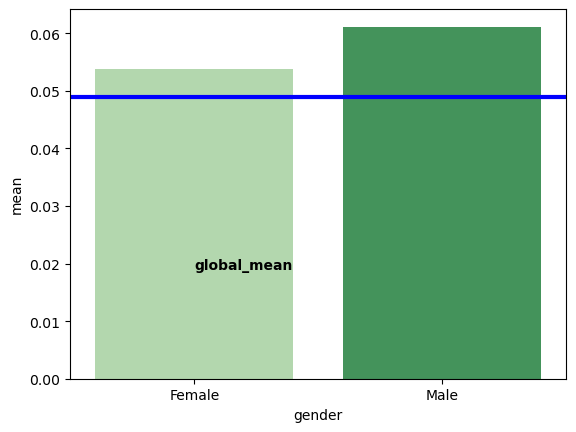

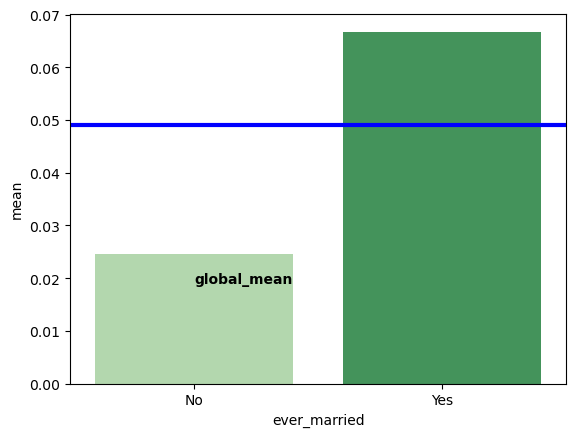

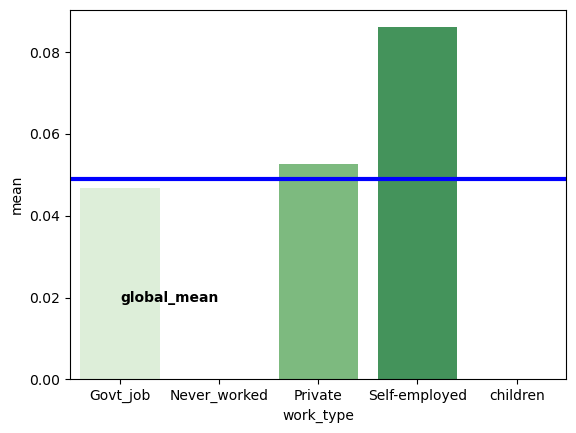

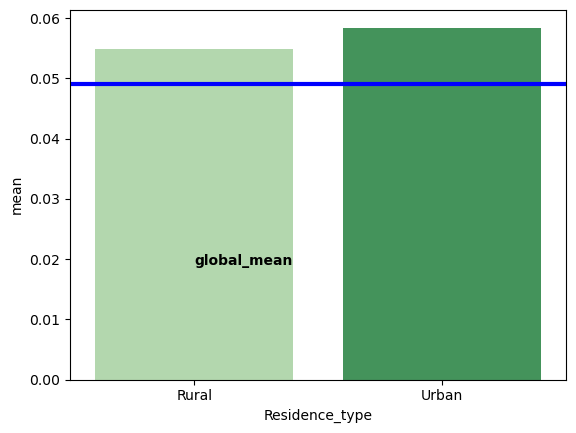

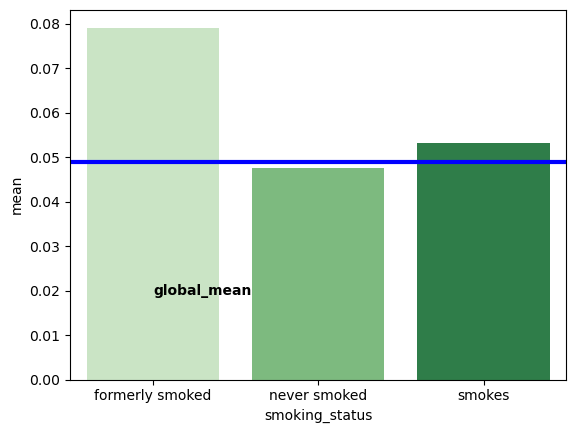

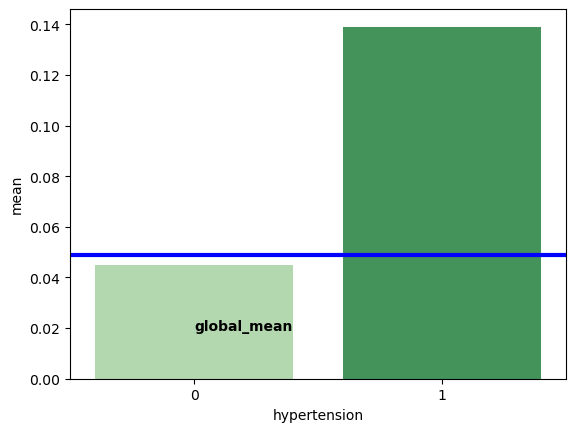

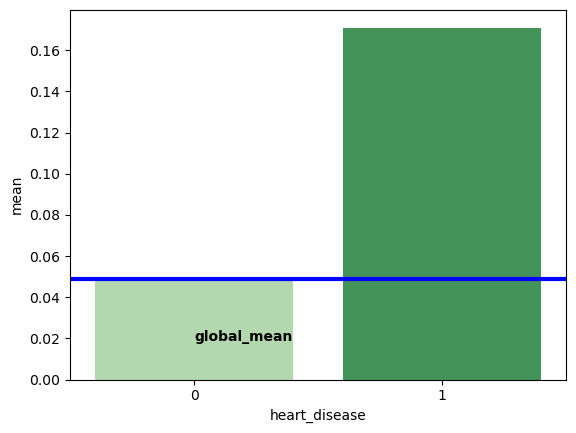

In [ ]:
for i, column_name in enumerate(cat[:]):   
    row = i//2
    col = i % 2
    df_group = df.groupby(by=column_name).stroke.agg(['mean']).reset_index()
    graph=sns.barplot(x= column_name , y='mean' , data=df_group, palette='Greens')
    graph.axhline(stroke_mean , linewidth=3, color='b')
    plt.text(0, stroke_mean - 0.03, "global_mean", color='black', weight='semibold')
    plt.show()

In [ ]:
# checking for missing values for the categorical features
df[cat].isna().sum()

gender            0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
hypertension      0
heart_disease     0
dtype: int64

## Numerical Features
### Univariate Analysis

*mean ≈ meadian , all the numerical variables so it may be normaly distributed

In [ ]:
# Extract a list of columns with numeric data types from the df
num = list(df.select_dtypes(exclude="O").columns)
#  Generate descriptive statistics for the numeric columns and transpose the output for better readability
# 'include="all"' ensures all available statistics are included
df[num].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,3565.0,48.860309,18.873140,10.00,34.00,50.00,63.00,82.00
avg_glucose_level,3565.0,108.972376,48.295550,55.12,77.46,92.65,116.67,271.74
bmi,3425.0,30.292350,7.295778,11.50,25.30,29.10,34.10,92.00


We are going to creat histograms for all the numeric columns in the DataFrame to visualize their distributions


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

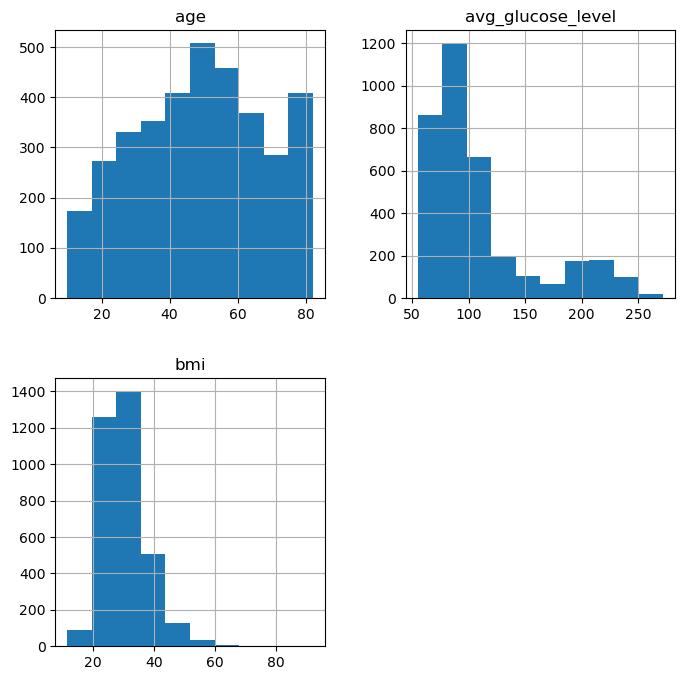

In [ ]:

df[num].hist(figsize=(8 ,8))


### checking for missing values for the numerical data

In [ ]:
df[num].isnull().sum()


age                    0
avg_glucose_level      0
bmi                  140
dtype: int64

In [ ]:
# Filling the NaN values in the 'bmi' column using KNNImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
df['bmi'] = imputer.fit_transform(df[['bmi']])

In [ ]:
df[num].isna().sum()

age                  0
avg_glucose_level    0
bmi                  0
dtype: int64

### Bivariate analysis
#### Summary statistics


In [ ]:
df.groupby('stroke')[num].agg(['mean' , 'median' , 'std' , 'min' , 'max']).T


stroke                             0           1
age               mean     47.700565   68.168317
                  median   48.000000   71.000000
                  std      18.589570   11.768555
                  min      10.000000   32.000000
                  max      82.000000   82.000000
avg_glucose_level mean    107.448379  134.344653
                  median   92.060000  106.575000
                  std      46.843959   62.993827
                  min      55.120000   56.110000
                  max     267.760000  271.740000
bmi               mean     30.273118   30.612533
                  median   29.400000   30.292350
                  std       7.216724    5.958113
                  min      11.500000   16.900000
                  max      92.000000   56.600000

### Analysing the 'age' column

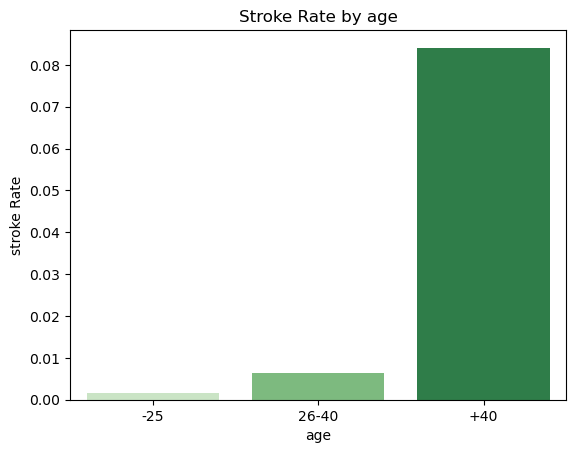

In [ ]:
a1 = df[(df['age'] <= 25)].stroke.mean()    
a2 = df[(df['age'] > 25) & (df['age'] <=40)].stroke.mean()
a3 = df[(df['age'] > 40)].stroke.mean()    

# df[(df['age'] > 40) & (df['age'] < 70)].stroke.mean()
sns.barplot(x =['-25', '26-40' ,'+40'], y =[a1,a2 ,a3], palette='Greens');
plt.title('Stroke Rate by age');
plt.xlabel('age');
plt.ylabel('stroke Rate');


### The Body mass index (BMI)
BMI categories:

1.Underweight: BMI < 18.5.

2.Normal weight: BMI 18.5–24.9.

3.Overweight: BMI 25–29.9.

4.Obesity: BMI ≥ 30 

In [ ]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

 We are going to create a new column  'bmi_cat' to the df, where each value is derived from the 'bmi' column by applying the categorize_bmi function. The categorize_bmi function presumably classifies each BMI value into categories or bins (such as underweight, normal weight, overweight, etc.).

In [ ]:
df['bmi_cat'] = df['bmi'].apply(categorize_bmi)


In [ ]:
# Display the count of unique values in the 'bmi_cat' column

df['bmi_cat'].value_counts()


bmi_cat
Obesity          1717
Overweight       1072
Normal weight     727
Underweight        49
Name: count, dtype: int64

In [ ]:
# Display the unique values present in the 'bmi_cat' column
df.bmi_cat.unique()


array(['Obesity', 'Normal weight', 'Overweight', 'Underweight'],
      dtype=object)

We are going to generate| a bar plot that visualizes the average stroke rate for different BMI categories. Each bar represents the mean stroke rate for a specific BMI category, such as 'Obesity', 'Normal weight', 'Overweight', and 'Underweight'. The plot uses a green color palette and labels the x-axis with BMI categories and the y-axis with the stroke rate.

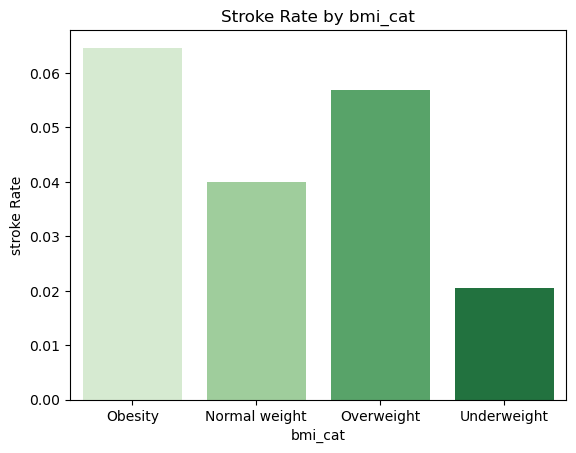

In [ ]:
sns.barplot(x = df.bmi_cat.unique() ,
            y = [df[df['bmi_cat'] == "Obesity"].stroke.mean() ,
                df[df['bmi_cat'] == 'Normal weight'].stroke.mean() ,
                df[df['bmi_cat'] == 'Overweight'].stroke.mean() ,
                df[df['bmi_cat'] == "Underweight"].stroke.mean() ] ,
            palette='Greens');
plt.title('Stroke Rate by bmi_cat');
plt.xlabel('bmi_cat');
plt.ylabel('stroke Rate');

### avg_glucose_level categories
We are going to classify glucose level into one of three categories based on its value. It returns:

'Normal' for glucose levels below 100 mg/dL,

'Prediabetes' for levels between 100 and 125 mg/dL,

'Diabetes' for levels 126 mg/dL and above.

In [ ]:
"""
Parameters:
    glucose (float): The glucose level to categorize.
    
    Returns:
    str: The category of the glucose level ('Normal', 'Prediabetes', or 'Diabetes').
    """

def categorize_glucose_level(glucose):
    if glucose < 100:
        return 'Normal'
    elif 100 <= glucose < 126:
        return 'Prediabetes'
    else:
        return 'Diabetes'

In [ ]:
# Apply the categorize_glucose_level function to each value in the 'avg_glucose_level' column
# and create a new column 'glucose_cat' to store the categorized glucose levels.
df['glucose_cat'] = df['avg_glucose_level'].apply(categorize_glucose_level)
# Display the count of each category in the 'glucose_cat' column.

df['glucose_cat'].value_counts()

glucose_cat
Normal         2131
Diabetes        759
Prediabetes     675
Name: count, dtype: int64

create a bar plot with glucose categories on the x-axis and their corresponding average stroke rates on the y-axis.

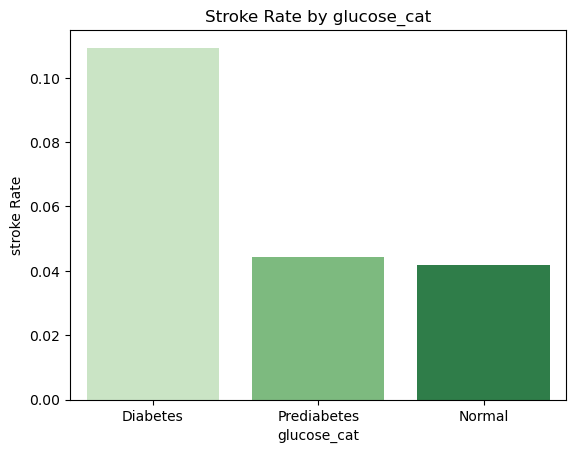

In [ ]:

# Create a bar plot showing the average stroke rate for each glucose category

sns.barplot(x = df.glucose_cat.unique() ,
            y = [df[df['glucose_cat'] == "Diabetes"].stroke.mean() ,
                df[df['glucose_cat'] == 'Prediabetes'].stroke.mean() ,
                df[df['glucose_cat'] == 'Normal'].stroke.mean()] ,
            palette='Greens');
plt.title('Stroke Rate by glucose_cat');
plt.xlabel('glucose_cat');
plt.ylabel('stroke Rate');

### Outliers in each stroke level
We now create a 2x2 grid of box plots to visualize the distribution of numerical features in relation to stroke status. Each subplot displays the distribution of one numerical variable, separated by stroke status (e.g., stroke = 0 vs. stroke = 1). The plots are arranged with adjusted spacing to ensure clarity and readability, with titles corresponding to each numerical feature. The x-axis tick labels are removed for a cleaner look, and any remaining labels are rotated for better visibility.



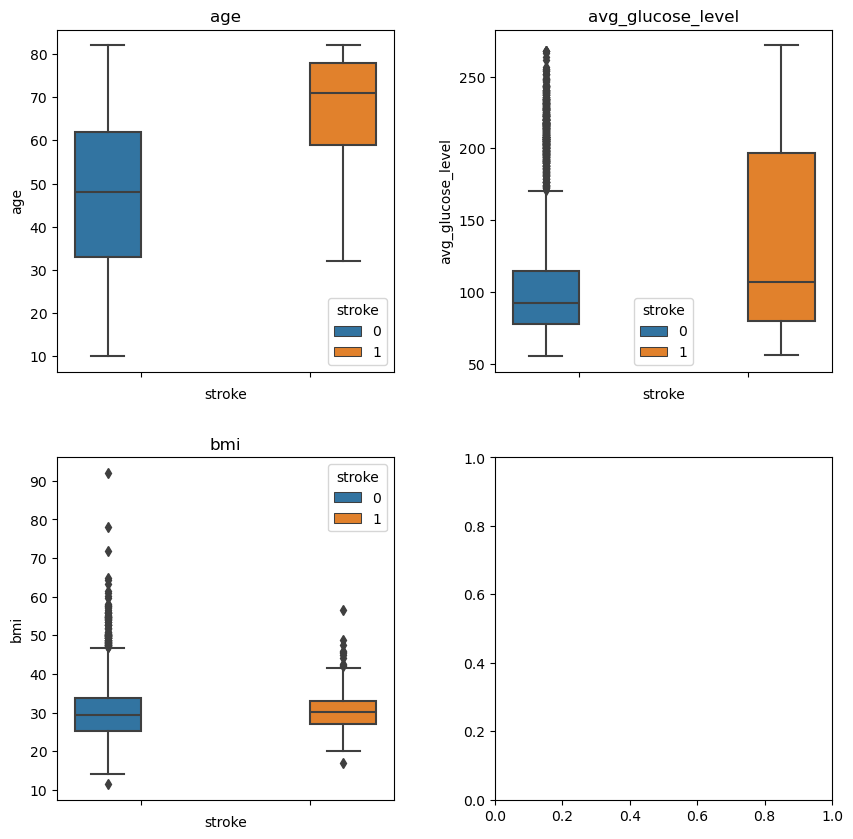

In [ ]:
figure, axis = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.25, wspace=0.3)

for i, column_name in enumerate(num):
    row = i//2
    col = i % 2
    bp = sns.boxplot(ax=axis[row, col], x=df['stroke'] , y=df[column_name] , hue=df['stroke']) 
    bp.set(xticklabels=[])
    bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 7)
    axis[row, col].set_title(column_name)
plt.show()

## Feature selection
### Categorical Features (Mutual information)
Mutual information;

More efficient to compare features importance.

Mutual information is a way to quantify the degree of dependency between two categorical variables, but it      doesn’t work when one of the features is numerical

MI(feature;target) = Entropy(feature) - Entropy(feature|target)

In [ ]:
"""
We are going to add two new categorical features: 'bmi_cat' and 'glucose_cat'.
This adjustment reflects the addition of these new variables, which categorize BMI and glucose levels, to the list of categorical features previously defined.
"""

cat = cat+ ['bmi_cat' , 'glucose_cat'] 


In [ ]:
# calculate  the Mutual Information (MI) scores between the stroke column and each categorical feature in the cat list.
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df.stroke)

df_mi = df[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
display(df_mi.head(7))

,MI
hypertension,0.006987
glucose_cat,0.006052
heart_disease,0.005793
ever_married,0.003596
work_type,0.002910
smoking_status,0.001512
bmi_cat,0.001092


Since some of the columns are not much important in my analysis, then i'm going to drop by removing them and focus on the remaining features.

In [ ]:
# dropping unwanted columns
df.drop(['smoking_status' , 'bmi_cat' , 'gender' ,"Residence_type"] , axis=1 , inplace=True)

In [ ]:
cat = list(df.select_dtypes(include="O").columns) # list that have an object data type, which typically represents categorical data.
cat.remove('stroke') # removes the column 'stroke' from this list

### Numerical Features (Correlation analysis)
Correlation analysis (In the binary case, if the values are high, we see more zeros than ones in the target variable. When the values are low, we see more ones.)

In [ ]:
"""
Lets now to understand the linear relationship between each numerical feature and the target variable.
The output should have a series where each entry represents the correlation coefficient between 'stroke' and a numerical feature
"""

df[num].corrwith(df.stroke)


age                  0.250765
avg_glucose_level    0.128773
bmi                  0.010975
dtype: float64

Thus the more each variable is getting high the more likly the person is stroked



In [ ]:
# # Compute the pairwise correlation matrix for all numerical features in the df.
# This matrix shows the Pearson correlation coefficients between each pair of numerical columns,
# helping to identify linear relationships and dependencies among numerical variables.


df[num].corr()


,age,avg_glucose_level,bmi
age,1.000000,0.233005,0.077648
avg_glucose_level,0.233005,1.000000,0.151694
bmi,0.077648,0.151694,1.000000


Going forward the 'bmi' column will not be needed or maybe redundant. We will be passing in 'inplace=True' parameter to ensure that the change is applied directly to the DataFrame without needing to assign it to a new variable.


In [ ]:
# dropping the 'bmi'
df.drop('bmi' , axis=1 , inplace=True)


We now remove 'bmi' from the list of numerical features, as the 'bmi' column has been dropped from the DataFrame.
This ensures that the 'bmi' column is no longer considered in subsequent analyses or operations involving numerical features.


In [ ]:
# removing bmi from the numerical features
num.remove('bmi')


## Modeling
### Data Resampling and spliting

We are going to split the dataset into training and testing sets

- 30% of the data is set aside for testing (test_df), while 70% is used for training (train).

Further split the training data into training and validation sets
- 15% of the original data is used for validation (valid_df), while the remaining 55% is used for training.

The random_state is set to 42 for reproducibility, and shuffle=True ensures the data is randomly shuffled before splitting.



In [ ]:

train , test_df  = train_test_split(df , test_size=0.3 , random_state=42 , shuffle=True)
train_df , valid_df = train_test_split(train , test_size=0.15 , random_state=42 , shuffle=True)

We are now going to check for the dimensions of the training, validation, and test datasets. This information provides insight into the size of each subset after splitting the original dataset, which is crucial for understanding how your data is distributed across different phases of model development.

In [ ]:
# checking number of samples and features in each dataset
train_df.shape , valid_df.shape , test_df.shape


((2120, 8), (375, 8), (1070, 8))

## Data preprocessing
### Encode and Scale the data for modeling

In [ ]:
# Transformers
from sklearn.compose import make_column_transformer
def preprocess(df_train, df_valid , df_test, num, cat):
    # Define transformers
    ohe = OneHotEncoder(drop='first')
    mms = MinMaxScaler()
    scaler =StandardScaler()

    transformer = make_column_transformer((mms, num),
                                           (ohe, cat),
                                          remainder='passthrough',verbose_feature_names_out=False)
    # Fitting & Transformation
    X_train = transformer.fit_transform(df_train[cat+num])
    X_valid = transformer.transform(df_valid[cat+num])
    X_test = transformer.fit_transform(df_test[cat+num])
    columns=transformer.get_feature_names_out()
    X_train = pd.DataFrame(X_train , columns=columns)
    X_valid = pd.DataFrame(X_valid , columns=columns)
    X_test = pd.DataFrame(X_test , columns=columns)
    cat = [i for i in list(columns) if i not in num]
    X_train[cat] = scaler.fit_transform(X_train[cat])
    X_valid[cat] = scaler.transform(X_valid[cat])
    X_test[cat] = scaler.fit_transform(X_test[cat])
    
   
    return X_train , X_valid, X_test, list(columns)

In [ ]:
X_train , X_val , X_test ,columns = preprocess(train_df, valid_df, test_df , num, cat)

# we pass in the 'preprocess' function to prepare the datasets for model training and evaluation.

In [ ]:
#Prepare the target variables for training, validation, and testing datasets.
# Convert 'stroke' column to integer type for each dataset

y_train = train_df.stroke.astype("int")
y_valid = valid_df.stroke.astype("int")
y_test_df = test_df.stroke.astype("int")

We are going to define several different classifiers and combines them into a voting classifier. Voting classifiers work by aggregating predictions from multiple models to improve performance and robustness. The individual models include logistic regression, decision tree, and XGBoost, while the meta-model (not used here directly) is a linear SVC for potential stacking (which isn’t implemented in this snippet).

In [ ]:
!pip install xgboost


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from xgboost import XGBClassifier

# Define individual classifiers
xgb = XGBClassifier()


lr = LogisticRegression(random_state=42 , C=0.5 , penalty = 'l2'  , class_weight={1 :0.7} )

tr = DecisionTreeClassifier(criterion="entropy" )

svc = SVC(random_state=42)

rm = RandomForestClassifier(n_estimators=30 , criterion="entropy" )

# Meta-model for stacking (not used in this snippet)
meta_model = SVC(kernel='linear', probability=True)

# Create a stacking classifier
vot = VotingClassifier(estimators=[
    ('lr', lr),
    ('tr', tr),
    ('gb', xgb)
])

In [ ]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import ClusterCentroids
from sklearn.metrics import accuracy_score , f1_score , roc_curve , confusion_matrix , recall_score 
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


models_pred = []
smote = SMOTE(random_state=42)
X_re , y_re  = smote.fit_resample(X_train , y_train)

print(f"Data shape : {X_re.shape}")
for model in [lr , svc  , tr  , rm , xgb , vot]:
    print(f"* {model} \n")
    model.fit(X_re, y_re)
    t_pred = model.predict(X_train)
    print('Train Confustion metric \n' , confusion_matrix(y_train ,t_pred))
    print("Train Cls Report \n" ,classification_report(y_train , t_pred))
    print("-"*50)
    val_pre = model.predict(X_val)
    print('validation Confustion metric \n' , confusion_matrix(y_valid ,val_pre))
    print("validation Cls Report \n" ,classification_report(y_valid , val_pre))
    print("-"*50)
    scores = cross_val_score(model , X_re , y_re , cv= KFold(n_splits=5 , shuffle=True) )
    print("Cross val score : " ,np.mean(scores))
    

Data shape : (4008, 11)
* LogisticRegression(C=0.5, class_weight={1: 0.7}, random_state=42) 

Train Confustion metric 
 [[1587  417]
 [  36   80]]
Train Cls Report 
               precision    recall  f1-score   support

           0       0.98      0.79      0.88      2004
           1       0.16      0.69      0.26       116

    accuracy                           0.79      2120
   macro avg       0.57      0.74      0.57      2120
weighted avg       0.93      0.79      0.84      2120

--------------------------------------------------
validation Confustion metric 
 [[289  67]
 [  6  13]]
validation Cls Report 
               precision    recall  f1-score   support

           0       0.98      0.81      0.89       356
           1       0.16      0.68      0.26        19

    accuracy                           0.81       375
   macro avg       0.57      0.75      0.58       375
weighted avg       0.94      0.81      0.86       375

--------------------------------------------------


From the above output we  can clearly see that the XGBoost or Voting Classifier is best for final model selection due to their higher cross-validation scores.

### Logistic Regression (lr)
We are now going to evaluate a classification model using the Logistic Regression (lr in this case) on the test dataset. It calculates and prints the confusion matrix and the classification report, which are essential metrics for assessing the model’s performance.

In [ ]:
test_pred = lr.predict(X_test)
print('* Confustion metric: \n' , confusion_matrix(y_test_df ,test_pred))
print("-"*50)
print("* Cls Report: \n" ,classification_report(y_test_df , test_pred))
print("-"*50)

* Confustion metric: 
 [[820 183]
 [ 29  38]]
--------------------------------------------------
* Cls Report: 
               precision    recall  f1-score   support

           0       0.97      0.82      0.89      1003
           1       0.17      0.57      0.26        67

    accuracy                           0.80      1070
   macro avg       0.57      0.69      0.57      1070
weighted avg       0.92      0.80      0.85      1070

--------------------------------------------------


Confusion Matrix Analysis:

True Negatives (TN): 820

False Positives (FP): 183

False Negatives (FN): 29

True Positives (TP): 38

The confusion matrix indicates that the model correctly predicted 820 instances as non-stroke (TN) and 38 instances as stroke (TP). However, it misclassified 183 non-stroke cases as stroke (FP) and 29 stroke cases as non-stroke (FN).

The model is highly precise in predicting non-stroke cases, meaning that when it predicts no stroke, it is correct 97% of the time.

The model identifies 82% of actual non-stroke cases correctly.

For class 1 ,The precision is low, indicating that only 17% of predicted stroke cases are actually strokes. This reflects a high rate of false positives for stroke predictions.

The model identifies 82% of actual non-stroke cases correctly(Recall for Class 0)

The precision for Class 1 (Stroke) is low, indicating that only 17% of predicted stroke cases are actually strokes. This reflects a high rate of false positives for stroke predictions.

The model correctly identifies 57% of actual stroke cases.(Class 1 ,Stroke)

The F1-score for class 1(Stroke), which is the harmonic mean of precision and recall, is quite low, suggesting that the model has poor performance in identifying stroke cases.

The overall accuracy is 80%, which reflects the proportion of total correct predictions (both stroke and non-stroke) over all predictions.


In [ ]:
df.dtypes

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

In [ ]:
# Checking the target feature:
print("Stroke People     : ", df['stroke'].value_counts()[1])
print("Non-Stroke People : ", df['stroke'].value_counts()[0])

Stroke People     :  202
Non-Stroke People :  3363


By seeing target feature, We clearly say we have imbalanced dataset.


## Summary

## Key findings
### 1.Significant Factors:

Features such as hypertension, heart_disease, bmi_cat, and glucose_cat were found to significantly influence stroke risk.
The presence of hypertension and heart disease showed a strong correlation with higher stroke risk.
### 2.High-Risk Identification:

The analysis revealed that individuals with high BMI or high glucose levels are at increased risk of stroke.
Categorical features like smoking status and work type also provided insights into stroke risk distribution.
### 3.Preventive Measures:

Based on the findings, preventive measures can include lifestyle modifications for individuals with high BMI or glucose levels.
Tailored health screenings and interventions are recommended for individuals with hypertension or heart disease.


## Recommendations

#### 1.Feature Engineering:

Enhance Feature Creation: Consider creating additional features or interactions between existing features to capture more complex patterns that may influence stroke risk.
#### 2.Model Improvement:

Experiment with Other Models: Beyond Logistic Regression, try using other classification models (e.g., Random Forest, Gradient Boosting) to improve predictive performance.

Hyperparameter Tuning: Optimize model parameters using techniques such as Grid Search or Random Search to enhance model accuracy.
#### 3.Handling Class Imbalance:

Resampling Techniques: If stroke cases are imbalanced, consider using oversampling (e.g., SMOTE) or undersampling techniques to balance the classes and improve model performance.
#### 4.Model Evaluation:

Cross-Validation: Implement cross-validation to ensure the model’s performance is consistent across different subsets of the data.

Additional Metrics: Evaluate models using additional metrics such as ROC-AUC or Precision-Recall curves to gain a comprehensive understanding of their performance

# Conclusion
The analysis provided insights into the relationship between various features and stroke risk. The preliminary Logistic Regression model served as a good starting point, but further exploration with additional models and feature engineering could yield better results. The recommendations focus on improving feature engineering, model selection, and evaluation strategies to enhance predictive accuracy and robustness. By addressing these areas, the overall effectiveness of predicting stroke risk can be significantly improved.